# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def gauss(mean, variance, x):
    gauss_vec = []
    for i in range(len(x)):
        prob = np.exp(-(x[i] - mean)**2/(2*variance))/(2*np.pi*variance)**(1/2)
        gauss_vec.append(prob)
    return gauss_vec

In [3]:
def uniform(x):
    return np.ones(len(x)) * 1/(np.max(x) - np.min(x))

In [4]:
x = np.linspace(-2, 2, 1000)
mean = 2
variance = 1
gauss_x = np.array(gauss(mean, variance, x))
uniform_x = uniform(x)

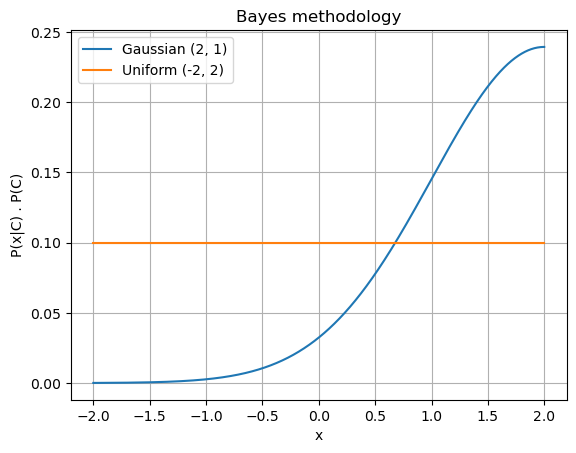

In [5]:
plt.plot(x, gauss_x * 0.6)
plt.plot(x, uniform_x * 0.4)
plt.grid('on')
plt.title('Bayes methodology')
plt.xlabel('x')
plt.ylabel('P(x|C) . P(C)')
plt.legend(['Gaussian (2, 1)', 'Uniform (-2, 2)'])
plt.show()

In [6]:
prior_c1 = 0.6
prior_c2 = 0.4
g1 = np.log(gauss_x) + np.log(0.6)
g2 = np.log(uniform_x) + np.log(0.4)
g = g1 - g2

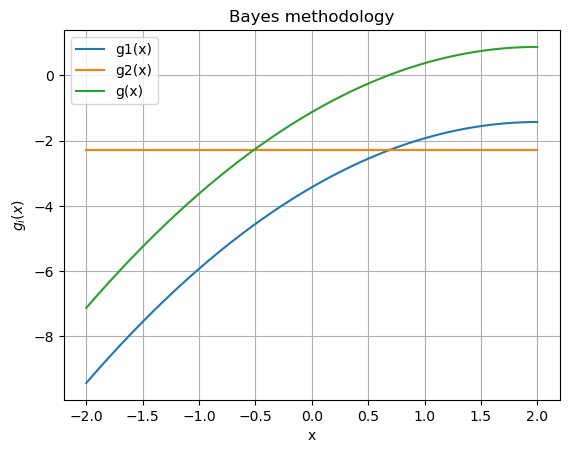

In [7]:
plt.plot(x, g1)
plt.plot(x, g2)
plt.plot(x, g)
plt.legend(['g1(x)', 'g2(x)', 'g(x)'])
plt.title('Bayes methodology')
plt.xlabel('x')
plt.ylabel('$g_{i}(x)$')
plt.grid('on')
plt.show()

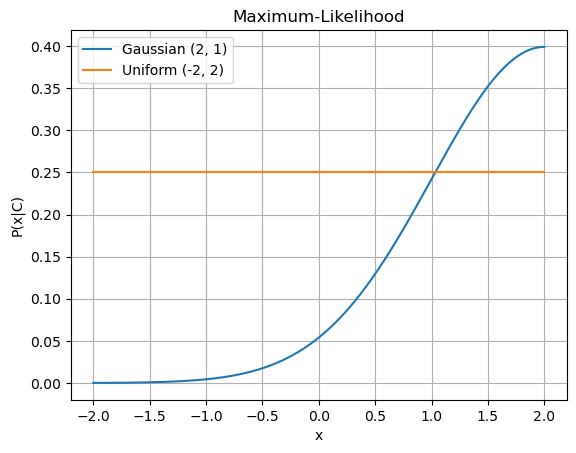

In [8]:
plt.plot(x, gauss_x)
plt.plot(x, uniform_x)
plt.grid('on')
plt.title('Maximum-Likelihood')
plt.xlabel('x')
plt.ylabel('P(x|C)')
plt.legend(['Gaussian (2, 1)', 'Uniform (-2, 2)'])
plt.show()

In [9]:
g1_ml = np.log(gauss_x)
g2_ml = np.log(uniform_x)
g_ml = g1_ml - g2_ml

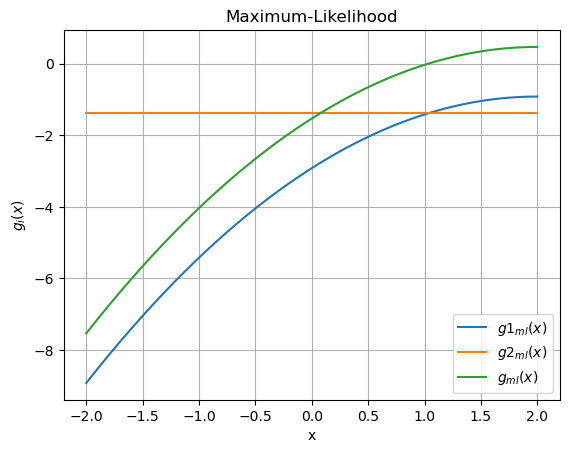

In [10]:
plt.plot(x, g1_ml)
plt.plot(x, g2_ml)
plt.plot(x, g_ml)
plt.legend(['$g1_{ml}(x)$', '$g2_{ml}(x)$', '$g_{ml}(x)$'])
plt.title('Maximum-Likelihood')
plt.xlabel('x')
plt.ylabel('$g_{i}(x)$')
plt.grid('on')
plt.show()

## Questão 2


[]

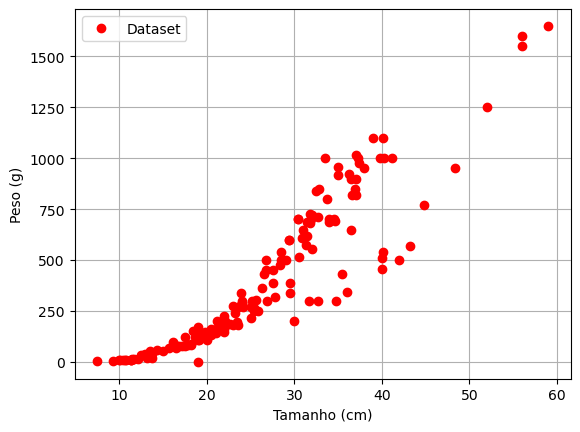

In [14]:
data = np.loadtxt('Fish.csv', delimiter=',', dtype=str)
weight, size = data[1:, 1], data[1:, 2]
weight = np.float64(weight)
size = np.float64(size)
dataset = []
size_ordered = []
weight_ordered = []

for i in range(len(weight)):
    dataset.append((size[i], weight[i]))

dataset_ordered = sorted(dataset)
for i in range(len(weight)):
    size_ordered.append(dataset_ordered[i][0])
    weight_ordered.append(dataset_ordered[i][1])

size_ordered = np.array(size_ordered)
weight_ordered = np.array(weight_ordered)

plt.plot(size_ordered, weight_ordered, 'ro')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Peso (g)')
plt.grid('on')
plt.legend(['Dataset'])
plt.plot()

In [15]:
def d_matrix(order, x):
    mat_d = np.ones([1, len(x)])
    for i in range(order):
        mat_d = np.vstack((mat_d, np.power(x, i + 1)))
    return np.transpose(mat_d)


In [16]:
def y_predict_model(order, x, w):
    y = np.zeros([len(x)])
    for j in range(len(x)):
        for i in range(order + 1):
            y[j] +=  x[j]**i * w[i]
    return y

[]

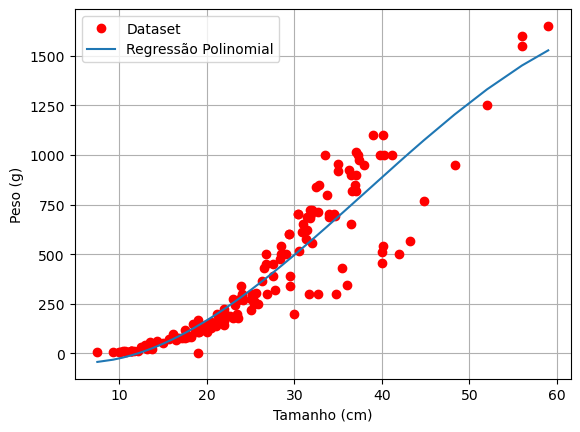

In [25]:
order_model = 3
d = d_matrix(order_model, size_ordered)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(d), d)), np.transpose(d)), weight_ordered)

y_predict = y_predict_model(order_model, size_ordered, w) 
plt.plot(size_ordered, weight_ordered, 'ro')
plt.plot(size_ordered, y_predict)
plt.xlabel('Tamanho (cm)')
plt.ylabel('Peso (g)')
plt.grid('on')
plt.legend(['Dataset', 'Regressão Polinomial'])
plt.plot()

In [54]:
train_dataset_len = round(0.8*len(weight))
np.random.shuffle(dataset)
train_dataset = dataset[0:train_dataset_len]
test_dataset = dataset[train_dataset_len:]